### EMNIST

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
# from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from emnist import extract_training_samples, extract_test_samples

# This will access the 'digits' subset
images, labels = extract_training_samples('digits')
test_images, test_labels = extract_test_samples('digits')


In [6]:
images.shape, labels.shape

((240000, 28, 28), (240000,))

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# Combine the datasets
combined_images = np.concatenate((images, test_images))
combined_labels = np.concatenate((labels, test_labels))

# Sample 60,000 instances randomly without replacement
sample_indices = np.random.choice(combined_images.shape[0], 60000, replace=False)
sampled_images = combined_images[sample_indices]
sampled_labels = combined_labels[sample_indices]

# Split the sampled dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(sampled_images, sampled_labels, test_size=10000/60000, random_state=42)

In [9]:
# from tensorflow.keras.utils import to_categorical

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the images to add a dimension for the channel
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split

In [15]:
# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the CNN model
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10


2024-02-13 23:34:33.440123: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 4s 21ms/step - loss: 0.4404 - accuracy: 0.8609 - val_loss: 0.1094 - val_accuracy: 0.9669
Epoch 2/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1085 - accuracy: 0.9678 - val_loss: 0.0599 - val_accuracy: 0.9823
Epoch 3/10
157/157 [==============================] - 4s 22ms/step - loss: 0.0738 - accuracy: 0.9779 - val_loss: 0.0498 - val_accuracy: 0.9838
Epoch 4/10
157/157 [==============================] - 4s 23ms/step - loss: 0.0580 - accuracy: 0.9815 - val_loss: 0.0421 - val_accuracy: 0.9868
Epoch 5/10
157/157 [==============================] - 4s 24ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0363 - val_accuracy: 0.9885
Epoch 6/10
157/157 [==============================] - 4s 22ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0373 - val_accuracy: 0.9879
Epoch 7/10
157/157 [==============================] - 4s 22ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0332 - val_accuracy: 0.9889
Epoch 8/10

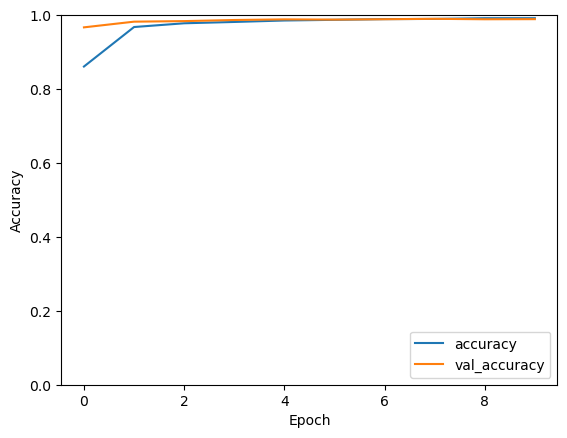

In [18]:
# Plot training history
plt.plot(cnn_history.history['accuracy'], label='accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0344 - accuracy: 0.9901 - 537ms/epoch - 2ms/step

Test accuracy: 0.9901000261306763


313/313 [==============================] - 1s 2ms/step


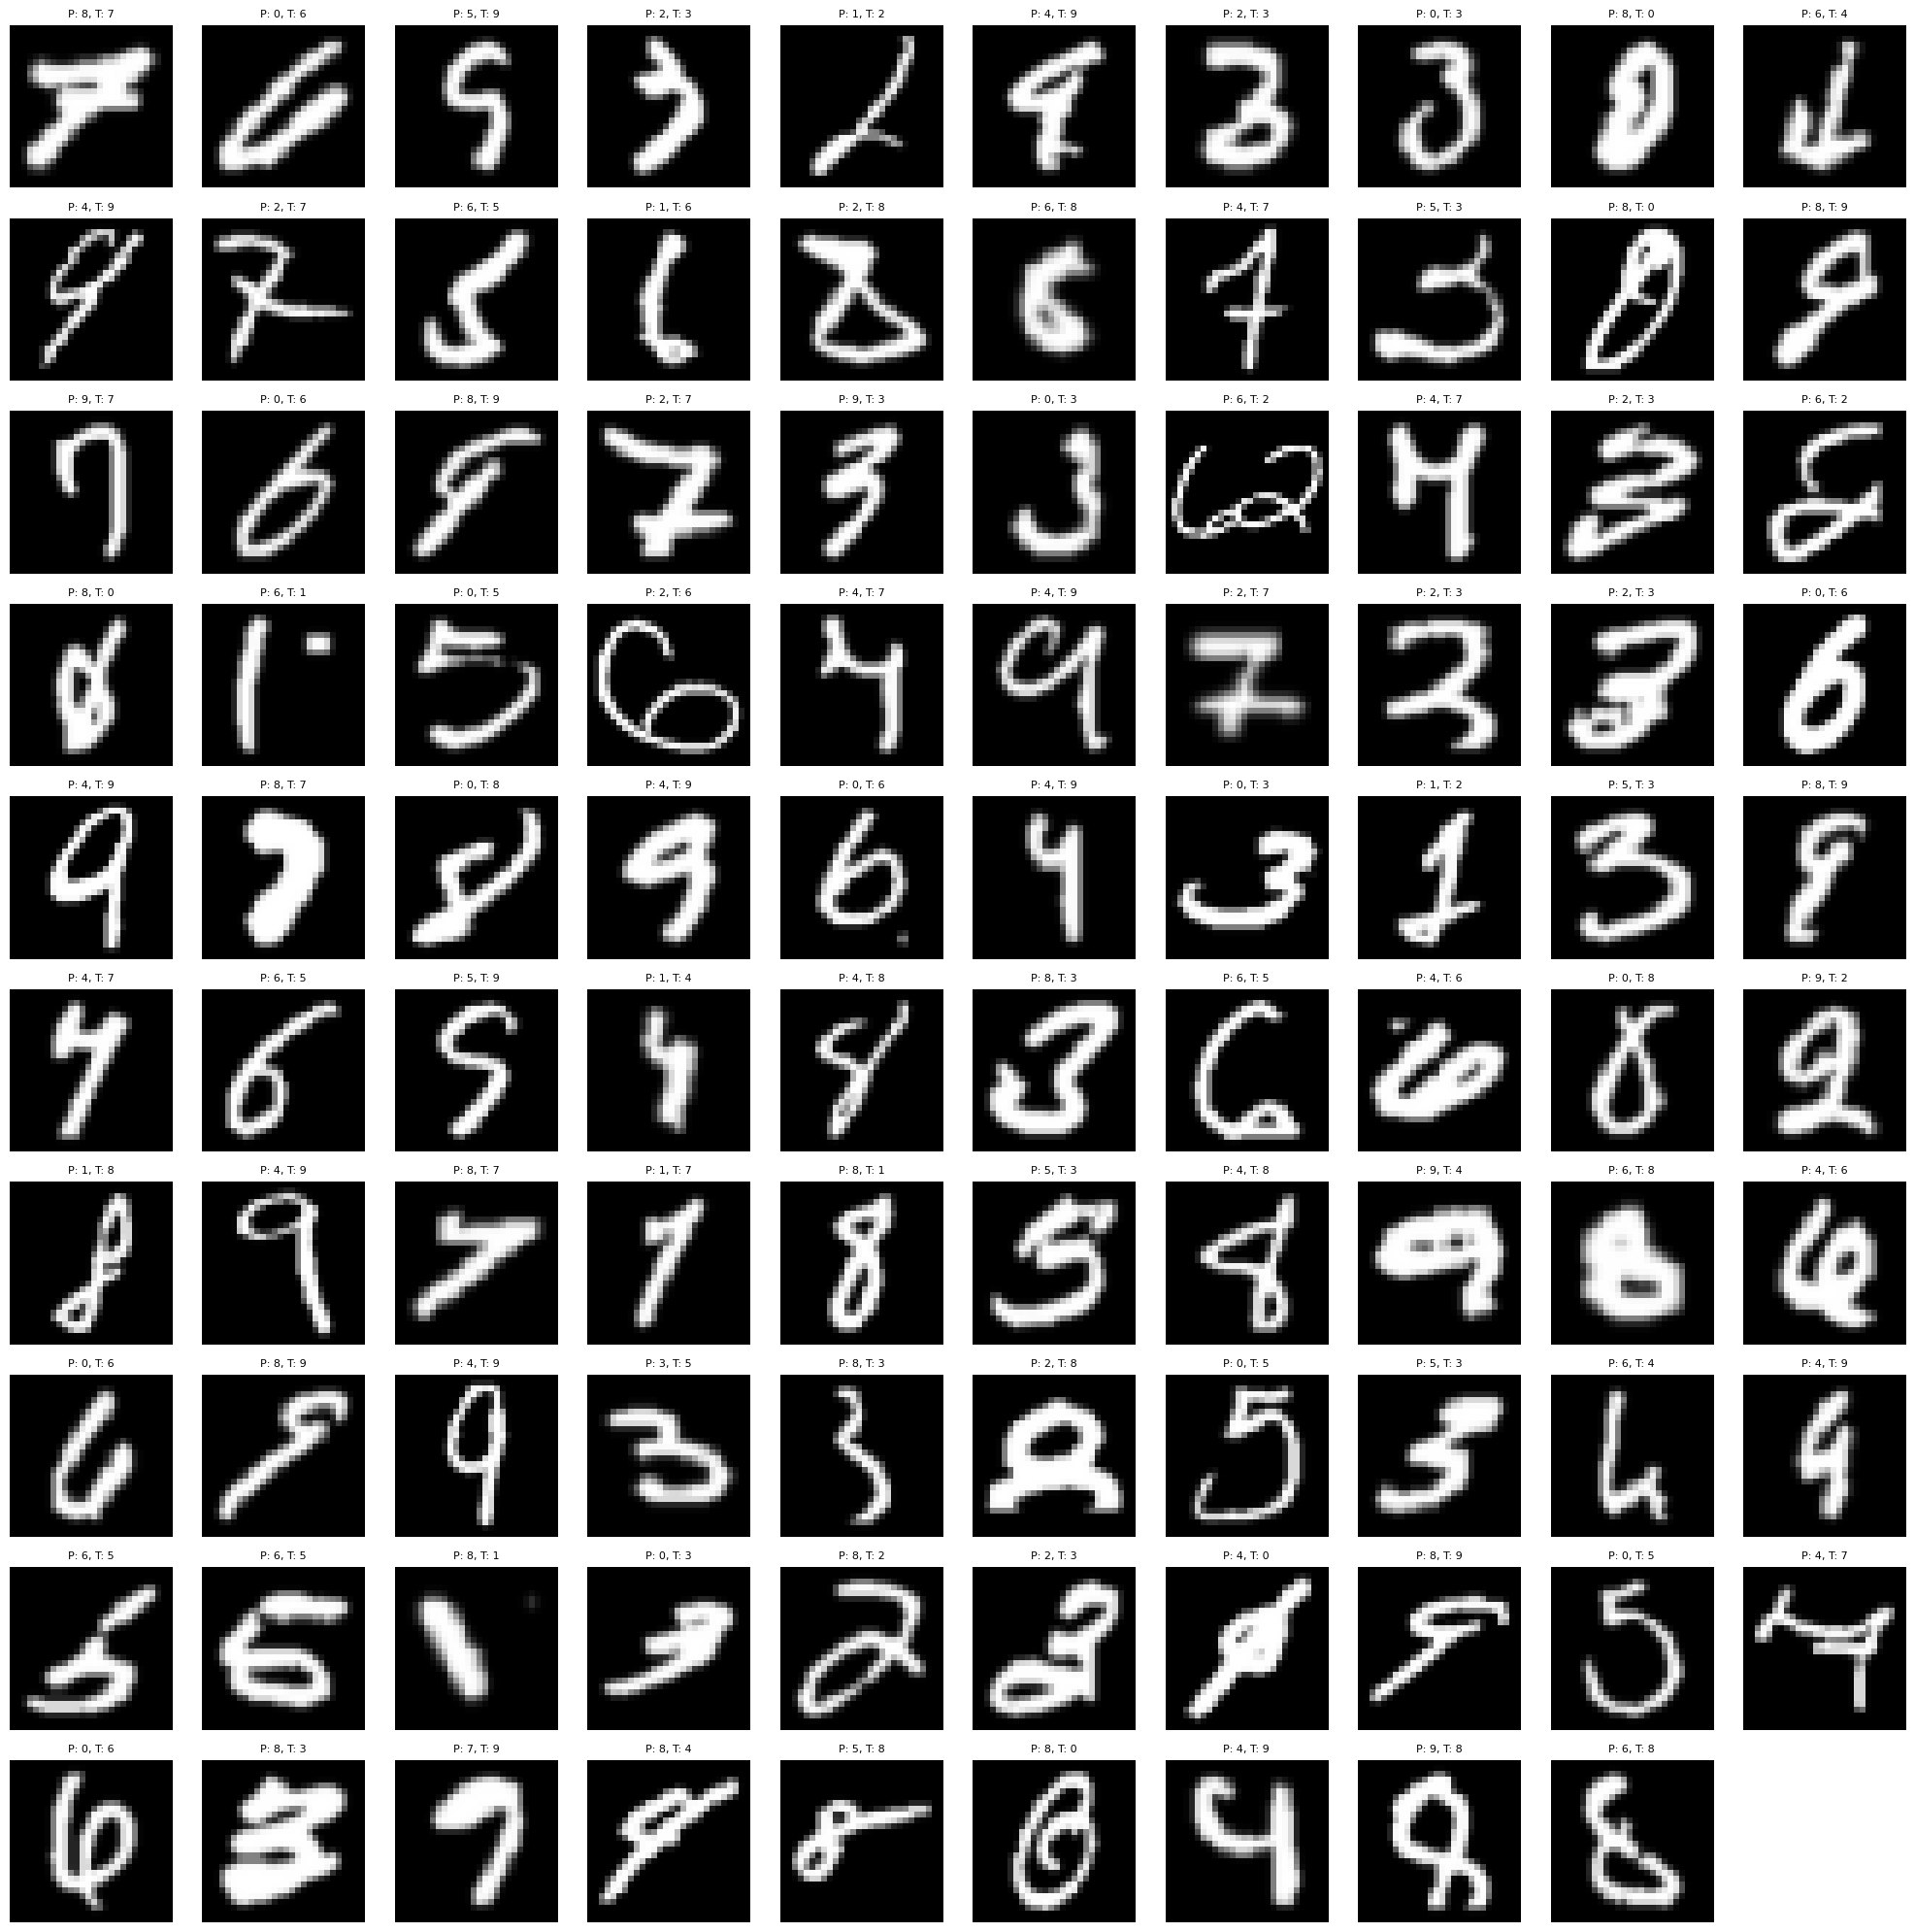

In [20]:
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = cnn_model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Identify the indices of misclassified examples
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Function to visualize misclassified examples
def plot_misclassified(indexes, y_pred_classes, y_true, images, rows=10, cols=10):
    """Plots a selection of the misclassified images in grid format."""
    n = len(indexes)
    if n > rows*cols:
        print(f"Displaying first {rows*cols} out of {n} misclassified examples.")
        n = rows*cols
    
    plt.figure(figsize=(2*cols, 2*rows))
    for i in range(n):
        idx = indexes[i]
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"P: {y_pred_classes[idx]}, T: {y_true[idx]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize first few misclassified examples
plot_misclassified(misclassified_indices, y_pred_classes, y_true, x_test)

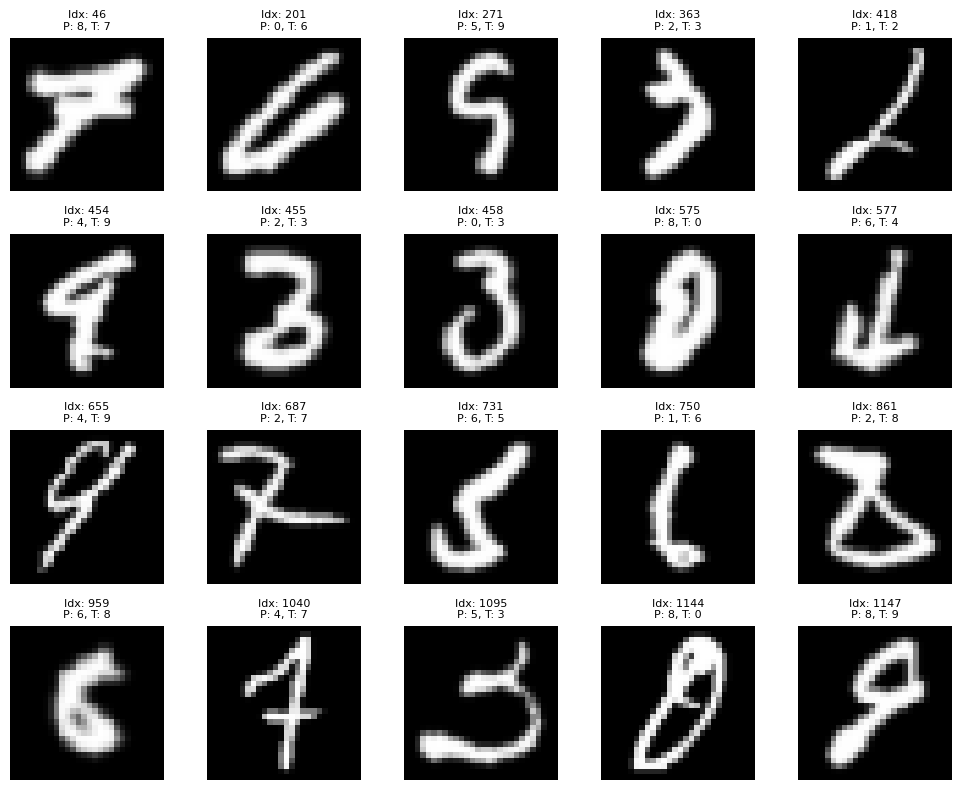

Enter indices to remove from this batch (0-19), separated by commas.
Total selected for removal: 1, Indices: [201]


In [33]:
def plot_misclassified_batch(indexes, y_pred_classes, y_true, images, start=0, batch_size=20):
    """Plots a batch of the misclassified images in grid format."""
    end = start + batch_size
    batch_indexes = indexes[start:end]
    n = len(batch_indexes)
    
    cols = 5
    rows = n // cols + (n % cols > 0)
    
    plt.figure(figsize=(2*cols, 2*rows))
    for i, idx in enumerate(batch_indexes):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Idx: {idx}\nP: {y_pred_classes[idx]}, T: {y_true[idx]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return batch_indexes

indices_to_remove = []

start_index = 0
batch_size = 20  # Or any other size you prefer

# Continue processing in batches
while start_index < len(misclassified_indices):
    displayed_indices = plot_misclassified_batch(misclassified_indices, y_pred_classes, y_true, x_test, start=start_index, batch_size=batch_size)
    
    # Ensure the user understands the valid range
    # print(f"Enter indices to remove from this batch (0-{len(displayed_indices)-1}), separated by commas.")
    indices_input = input("Indices: ").strip()
    if indices_input:
        selected_batch_indices = [int(idx) for idx in indices_input.split(',') if idx.isdigit()]
        for batch_idx in selected_batch_indices:
            batch_indx = batch_idx - 1
            if batch_idx < len(displayed_indices):  # Ensure the index is within the current batch range
                actual_idx = displayed_indices[batch_idx]
                indices_to_remove.append(actual_idx)
            else:
                print(f"Index {batch_idx} is out of bounds for this batch.")
    
    continue_input = input("Continue to the next batch? (y/n): ").strip().lower()
    if continue_input != 'y':
        break
    
    start_index += batch_size

# Output for verification
print(f"Total selected for removal: {len(indices_to_remove)}, Indices: {indices_to_remove}")